In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import datetime

In [2]:
#以美国为例
data_part_allworld= pd.read_csv('./处理后的数据集/部分热门国家数据.csv')
#筛选出美国数据
USA_data=data_part_allworld[data_part_allworld['名称']=='美国']
#重排索引值
USA_data.reset_index(drop=True, inplace=True)
t=np.arange(1,USA_data['日期'].shape[0]+1,1)
P=USA_data['累计确诊']
P=np.array(P)
USA_data

,日期,名称,累计确诊,累计疑似,累计治愈,累计死亡,累计重症,当日新增确诊,当日新增疑似,当日新增治愈,当日新增死亡,当日新增重症,当日现存确诊
0,2020-02-08,美国,14,0,0,0,0,14,0.0,0,0,NaN,14
1,2020-02-13,美国,15,0,0,0,0,1,0.0,0,0,NaN,15
2,2020-02-21,美国,34,0,0,0,0,19,0.0,0,0,NaN,34
3,2020-02-22,美国,53,0,0,0,0,19,0.0,0,0,NaN,53
4,2020-02-24,美国,53,0,0,0,0,0,0.0,0,0,NaN,53
5,2020-02-25,美国,57,0,0,0,0,4,0.0,0,0,NaN,57
6,2020-02-26,美国,60,0,0,0,0,3,0.0,0,0,NaN,60
7,2020-02-27,美国,60,0,0,0,0,0,NaN,0,0,NaN,60
8,2020-02-28,美国,63,0,1,0,0,3,0.0,1,0,NaN,62
9,2020-02-29,美国,63,0,1,1,0,0,0.0,0,1,NaN,61


In [3]:
# 定义逻辑增长函数
def logistic_increase_function(t,K,P0,r):
    t0=1
    r=0.2
#   r值越大，模型越快收敛到K，r值越小，越慢收敛到K
    exp_value=np.exp(r*(t-t0))
    return (K*exp_value*P0)/(K+(exp_value-1)*P0)

In [4]:
# 用最小二乘法估计拟合
popt, pcov = curve_fit(logistic_increase_function, t, P)
#获取popt里面是拟合系数
print("K:",popt[0],"P0:",popt[1],"r:",popt[2])

K: 1335257.1052717061 P0: 76.3348080389152 r: 1.0


/Users/lirenbo/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [8]:
#拟合后预测的P值
P_t=np.arange(1,100,1)
P_predict = logistic_increase_function(P_t,popt[0],popt[1],popt[2])
#未来预测
future=np.arange(USA_data['日期'].shape[0]+1,USA_data['日期'].shape[0]+40,2)
future_predict=logistic_increase_function(future,popt[0],popt[1],popt[2])

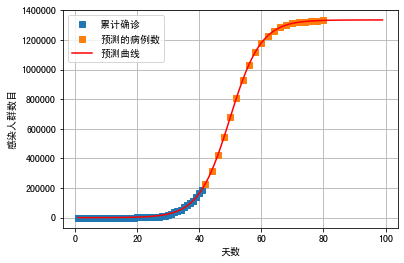

<Figure size 432x288 with 0 Axes>

In [14]:
# 画出预测图
plot1 = plt.plot(t, P, 's',label="累计确诊")
plot2 = plt.plot(future, future_predict, 's',label='预测的病例数')
plot3 = plt.plot(P_t, P_predict, 'r',label='预测曲线')
plt.xlabel('天数')
plt.ylabel('感染人群数目')
plt.legend(loc=0)
plt.grid()  # 显示网格
plt.show() 